# Section I. Main

### Load libraries, functions, palette, theme

In [105]:
# load libraries and palette
%run _libraries.ipynb

In [106]:
# load functions
# from __functions import *
%run _functions.ipynb

In [3]:
# start stopwatch
start = stopwatch_start()

### Variables

In [194]:
path_save_img = 'docs/img/'

## World PCI

In [4]:
data = pd.read_excel('data/pci_world.xls', sheet_name='Data')

In [5]:
data.columns = data.iloc[2, :].copy()

In [6]:
data = data.iloc[3:, :].copy()

In [7]:
data.columns = [to_int(i) for i in data.columns]

In [8]:
data.index = data['Country Name']

In [9]:
data.index.name = None

In [10]:
data = data.iloc[:, 4:].copy()

In [11]:
data = data.T.copy()

In [12]:
data_rf = data.loc[data['Russian Federation'].notna(), 'Russian Federation'].copy()

In [259]:
pio.templates['primetheme'] = go.layout.Template(
    layout = {
        'hidesources': True,
        'autosize': False,
        'width': 750,
        'height': 250,
        'margin': dict(
            t=10, r=50, l=50, b=50, pad=120
        ),
        'font' : {
            'family': 'Ubuntu',
            'size': 10,
        },
        'title': {
            'font': {
                'family': 'Ubuntu',
                'color': '#505050',
                'size': 15
            },
            'x': 0.1,
            'y': 0.95
        },
        'colorway': list(
            (
            #    0 : 0.3    1 red      2 blue     3 green    4 yellow
                '#4B4B4B', '#AF4035', '#4682B4', '#2C8B6D', '#FFA500',
            #    5 brown    6 khaki    7 purple   8 pink     9 orange
                '#6C4839', '#9A7D4D', '#534D89', '#C95576', '#DE6535',
            #   -10 dark   -9 blue    -8 blue    -7 blue    -6 ligt
                '#304E68', '#3D6384', '#4D7DA8', '#6D9BC3', '#A7CBE8',
            #   -5 : 0.2   -4 : 0.5   -3 : 0.65  -2 : 0.75  -1 : 0.85
                '#353535', '#7F7F7F', '#A5A5A5', '#BFBFBF', '#D9D9D9')
            ),
        'dragmode': False,
        'xaxis': dict(
            anchor='free',
            position=0,
            color='#909090',
            ticks='outside',
            griddash='1px',
            gridwidth=1,
            gridcolor='#F9F9F9',
            linecolor='#E1E1E1',
            linewidth=1,
            ticklen=5,
            tickcolor='#FCFCFC',
            showgrid=True,
            showline=True,
            showticklabels=True,
            zeroline=False,
            title={
                'font': dict(
                    color='#808080'),
                'standoff': 10},
            tickangle=0,
        ),
        'yaxis': dict(
            anchor='free',
            color='#909090',
            ticks='outside',
            griddash='1px',
            gridwidth=1,
            gridcolor='#F9F9F9',
            linecolor='#E1E1E1',
            linewidth=1,
            ticklen=5,
            tickcolor='#FCFCFC',
            position=0,
            showgrid=True,
            showline=True,
            showticklabels=True,
            zeroline=False,
            title={
                'font': dict(
                    color='#808080'),
                'standoff': 10},
            tickangle=0
        ),
        'legend': dict(
            title={
                'font': {
                    'family': 'Ubuntu',
                    'color': '#4B4B4B',
                    'size': 12,
                    'style': 'normal',
                    'weight': 'bold'
                }
            },
            font={
                'family': 'Ubuntu',
                'color': '#808080',
                'size': 10,
                'style': 'normal',
                'weight': 'normal'
            },
            orientation='h',
            yanchor="top",
            y=1.25,
            xanchor="left",
            x=0,
            entrywidth=50,
            itemsizing='trace', itemwidth=30, tracegroupgap=10, indentation=0),
        # 'paper_bgcolor': 'rgba(0,0,0,0)',
        # 'plot_bgcolor': 'rgba(0,0,0,0)',
    },
    data = {
        # Each graph object must be in a tuple or list for each trace
        'bar': [
            go.Bar(
                texttemplate ='%{value:$.2s}',
                textposition='outside',
                textfont= {
                    'family': 'Ubuntu',
                    'size': 10,
                    'color': '#FFFFFF'
                    })
            ],
        'scatter': [
            go.Scatter(
                line={
                    'width': 1.75},
                marker={
                    'size': 3}
            )
        ]
    }
)

pio.templates.default = 'primetheme'
palette = pio.templates['primetheme'].layout.colorway

In [267]:
data['Finland'][:-1].isna().any()

False

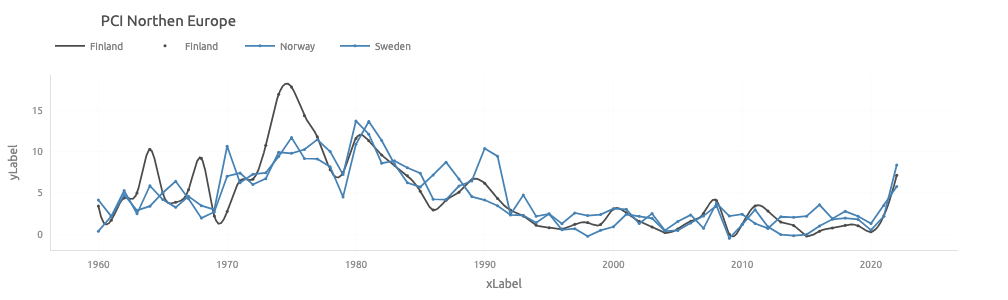

File 'pci_scandinavia.html' saved into folder 'docs/img/'


In [286]:
fig = pl_figure(figsize=(800, 300))

# pl_plot(
#     go.Scatter(x=data.index, y=data['Finland'], mode='lines+markers', line_color=palette[0], name='Finland'), fig)


pl_plot(
    go.Scatter(
        x=smoothed(data['Finland'][:-1]).index,
        y=smoothed(data['Finland'][:-1]).values.ravel(),
        mode='lines', line_color=palette[0], name='Finland'), fig)

pl_plot(
    go.Scatter(
        x=data['Finland'][:-1].index,
        y=data['Finland'][:-1],
        mode='markers', line_color=palette[0], legend=None, name='Finland'), fig)


pl_plot(
    go.Scatter(x=data.index, y=data['Norway'], mode='lines+markers', name='Norway'), fig)
pl_plot(
    go.Scatter(x=data.index, y=data['Sweden'], mode='lines+markers', line_color=palette[2], name='Sweden'), fig)

pl_labels(x='xLabel', y='yLabel', fig=fig)
pl_title('PCI Northen Europe', size=15, fig=fig)
# pl_rstyle(xticks=[1960, 2025, 5], yticks=[0, 20, 5], ylim=[-1, 20])

fig.show(config=config)
pl_savefig(fig, 'pci_scandinavia', dir=path_save_img, config=config)

In [285]:
def pl_savefig(fig, name=None, dir=None, config=None, fmt='html'):
    
    if fmt == 'chart_studio':
        py.plot(fig, filename=name, auto_open=False, config=config)
        print("Figure saved into Chart-studio")
        
    elif fmt == 'html':
        # check if dir exists and create it if not
        if dir is None:
            dir = os.getcwd()
            folder = dir.split(os.sep)[-1]
        else:
            folder = dir
        filename = dir+'/'+name+'.'+fmt
        plotly.offline.plot(fig, filename=filename, config=config, auto_open=False)
        print(f"File '{name+'.'+fmt}' saved into folder '{folder}'")
    
    else:
        # check if dir exists and create it if not
        if dir is None:
            dir = os.getcwd()
            folder = dir.split(os.sep)[-1]
        else:
            folder = dir
        if not os.path.exists(dir):
            os.makedirs(dir)

        filename = dir+'/'+name+'.'+fmt
        fig.write_image(filename, engine='kaleido')
        
        print(f"File '{name+'.'+fmt}' saved into folder '{folder}'")

In [ ]:
config=dict(scrollZoom=True, showLink=False)

In [279]:
config = dict(
    scrollZoom=False,
    showLink=False,
    displaylogo=False,
    displayModeBar=True,
    locale='ru',
    responsive=True,
    toImageButtonOptions = {
        'format': 'svg', # one of png, svg, jpeg, webp
        'filename': 'custom_image',
        'height': None,
        'width': None,
        'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
        },
    # double click on plot - reset scale
    modeBarButtonsToRemove = [
        'lasso',
        'select',
        'zoom',
        'pan',
        'pan2d'
        'zoomIn2d',
        'zoomOut2d',
        'autoScale2d',
        # 'resetScale2d',
        
    ]
)

In [ ]:
modeBarButtonsToRemove = [
    'zoom',
    'pan',
    'select',
    'zoomIn',
    'zoomOut',
    'autoScale',
    'resetScale',
    'zoom2d',
    'pan2d',
    'select2d',
    'lasso2d',
    'zoomIn2d',
    'zoomOut2d',
    'autoScale2d',
    'resetScale2d',
]

In [ ]:
zoom, pan, select, zoomIn, zoomOut, autoScale, resetScale

In [224]:
smoothed(data[data['United States'].notna()]['United States']).index

Index([            1960.0, 1960.2073578595318, 1960.4147157190635,
       1960.6220735785953, 1960.8294314381271,  1961.036789297659,
       1961.2441471571906, 1961.4515050167224, 1961.6588628762543,
       1961.8662207357859,
       ...
       2020.1337792642141, 2020.3411371237457, 2020.5484949832776,
       2020.7558528428094,  2020.963210702341, 2021.1705685618729,
       2021.3779264214047, 2021.5852842809365, 2021.7926421404682,
                   2022.0],
      dtype='float64', length=300)

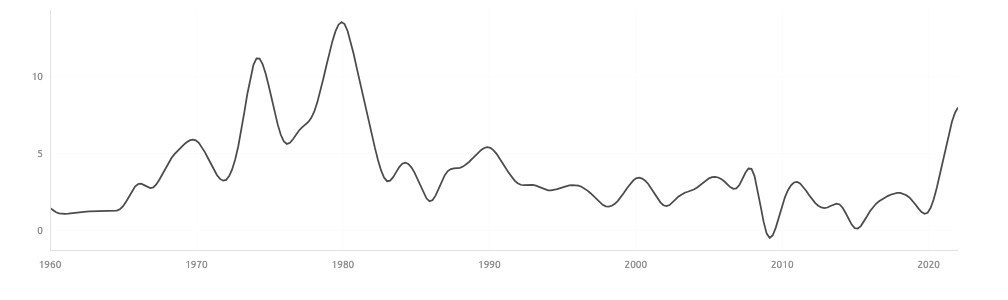

In [239]:
fig = pl_figure(figsize=(800, 300))

# pl_plot(
#     go.Scatter(
#         x=smoothed(data[data['United States'].notna()]['United States']).index,
#         y=smoothed(data[data['United States'].notna()]['United States']).values,
#         ), fig)

# fig.add_trace(
#     go.Scatter(
#         data=smoothed(data[data['United States'].notna()]['United States'])
#     )
# )

# fig = px.scatter(
#     x=smoothed(data[data['United States'].notna()]['United States']).index,
#     y=smoothed(data[data['United States'].notna()]['United States']).values.ravel())

pl_plot(
    go.Scatter(
        x=smoothed(data[data['United States'].notna()]['United States']).index,
        y=smoothed(data[data['United States'].notna()]['United States']).values.ravel()
    ), fig
)

fig.show(config=config)

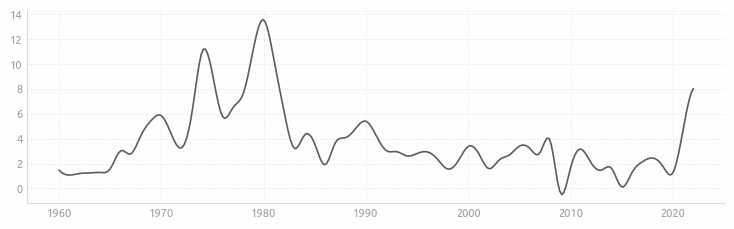

In [219]:
plt.plot(
    smoothed(data[data['United States'].notna()]['United States'])
)

In [ ]:
pl_plot

In [214]:
smoothed(data[data['United States'].notna()]['United States']).index

Index([            1960.0, 1960.2073578595318, 1960.4147157190635,
       1960.6220735785953, 1960.8294314381271,  1961.036789297659,
       1961.2441471571906, 1961.4515050167224, 1961.6588628762543,
       1961.8662207357859,
       ...
       2020.1337792642141, 2020.3411371237457, 2020.5484949832776,
       2020.7558528428094,  2020.963210702341, 2021.1705685618729,
       2021.3779264214047, 2021.5852842809365, 2021.7926421404682,
                   2022.0],
      dtype='float64', length=300)

In [215]:
smoothed(data[data['United States'].notna()]['United States'])

,United States
1960.000000,1.457976
1960.207358,1.295328
1960.414716,1.182598
1960.622074,1.112524
1960.829431,1.077843
...,...
2021.170569,5.454426
2021.377926,6.320802
2021.585284,7.073426
2021.792642,7.653643


### Execution time

In [17]:
stopwatch_stop(start)

Execution time: 0:00:12
